In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [8]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [9]:
from sklearn.metrics import accuracy_score

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


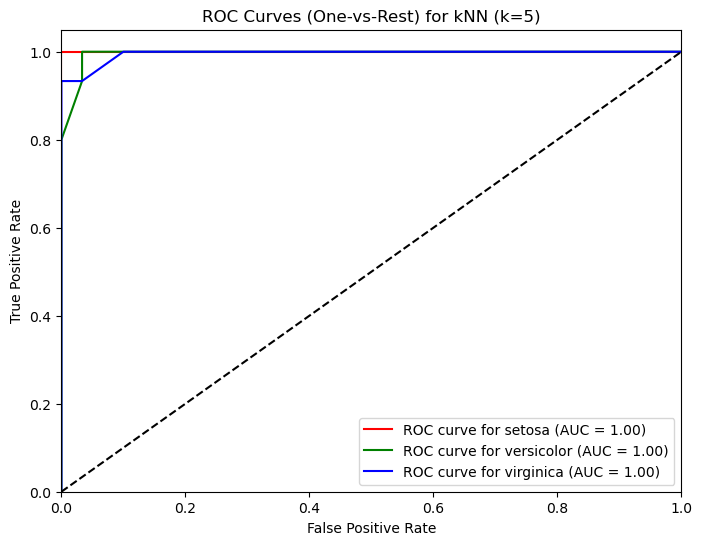

In [10]:
# Binarize labels for ROC
y_bin = label_binarize(y, classes=[0,1,2])
n_classes = y_bin.shape[1]

# Train OvR classifier
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y_bin, test_size=0.3, random_state=42, stratify=y
)
classifier.fit(X_train2, y_train2)
y_score = classifier.predict_proba(X_test2)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(8,6))
colors = ["red", "green", "blue"]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f"ROC curve for {iris.target_names[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest) for kNN (k=5)")
plt.legend(loc="lower right")
plt.show()
